<a href="https://colab.research.google.com/github/amilsiddik/percobaan/blob/main/GEV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dataAinun = pd.read_excel('/content/drive/MyDrive/Ainun Folder/Aneka sort.xlsx')
dataAinun

,Aneka,Cargo,Engi,Fire,Hull,KBM
0,5.267075e+08,NaN,NaN,NaN,NaN,35670000.0
1,5.025018e+08,NaN,NaN,NaN,NaN,3239100.0
2,5.000000e+08,NaN,NaN,NaN,NaN,12861109.0
3,3.752046e+08,NaN,NaN,NaN,NaN,2231277.0
4,3.072982e+08,NaN,NaN,NaN,NaN,11423437.0
...,...,...,...,...,...,...
1201,NaN,NaN,NaN,NaN,NaN,4189350.0
1202,NaN,NaN,NaN,NaN,NaN,4193205.0
1203,NaN,NaN,NaN,NaN,NaN,9690100.0
1204,NaN,NaN,NaN,NaN,NaN,4137000.0


In [3]:
dataAneka = dataAinun['Aneka']
dataAneka.describe()

count    5.360000e+02
mean     5.211559e+07
std      7.212737e+07
min      1.875000e+05
25%      3.187229e+06
50%      2.320388e+07
75%      7.361031e+07
max      5.267075e+08
Name: Aneka, dtype: float64

In [4]:
dataAneka = dataAneka.dropna()

In [5]:
dataAneka

0      5.267075e+08
1      5.025018e+08
2      5.000000e+08
3      3.752046e+08
4      3.072982e+08
           ...     
531    4.630000e+05
532    3.406344e+05
533    2.700000e+05
534    2.410000e+05
535    1.875000e+05
Name: Aneka, Length: 536, dtype: float64

In [6]:
dataAneka.describe()

count    5.360000e+02
mean     5.211559e+07
std      7.212737e+07
min      1.875000e+05
25%      3.187229e+06
50%      2.320388e+07
75%      7.361031e+07
max      5.267075e+08
Name: Aneka, dtype: float64

In [7]:
import numpy as np
import scipy.stats
import statistics
import math
# import powerlaw
# from scipy.stats import powerlaw
from scipy.stats import genpareto
import matplotlib.pyplot as plt

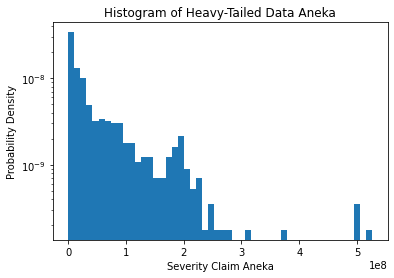

In [10]:
plt.hist(dataAneka, bins=50, density = True, log = True)
plt.title("Histogram of Heavy-Tailed Data Aneka")
plt.xlabel("Severity Claim Aneka")
plt.ylabel("Probability Density")
plt.show()

In [ ]:
!pip install openturns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.3 MB 331 kB/s 


In [12]:
import numpy as np
from scipy.stats import genextreme

In [13]:
shape, loc, scale = genextreme.fit(dataAneka)
print("Fit parameters:")
print(f"  shape: {shape:.4f}")
print(f"  loc:   {loc:.4f}")
print(f"  scale: {scale:.4f}")
print()

Fit parameters:
  shape: -11.8909
  loc:   187503.2818
  scale: 39.0237



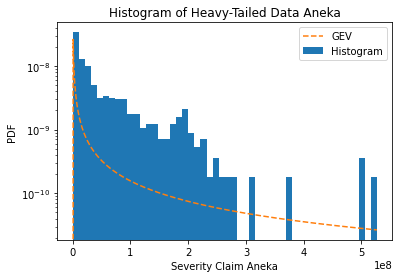

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev

plt.hist(dataAneka, bins=50, density = True, log = True)
plt.title("Histogram of Heavy-Tailed Data Aneka")
plt.xlabel("Severity Claim Aneka")
plt.ylabel("PDF")
#plt.show()

xx = np.linspace(0, 5.267075e+08, 535)
yy = gev.pdf(xx, shape, loc, scale)
plt.plot(xx, yy, '--')
plt.legend(["GEV","Histogram"], loc ="upper right")
plt.show()

In [34]:
alpha = float(0.05)
scale1 = float(scale)
shape1 = float(shape)
loc1 = float(loc)
VaR=(loc1-((scale1/shape1)*(1+(math.log(1-alpha))**(-shape1))))
VaR

(187506.56364000356-5.06057150103949e-16j)

TypeError: ignored

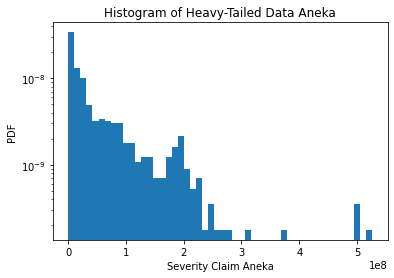

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev

plt.hist(dataAneka, bins=50, density = True, log = True)
plt.title("Histogram of Heavy-Tailed Data Aneka")
plt.xlabel("Severity Claim Aneka")
plt.ylabel("PDF")
#plt.show()
plt.axvline(x=VaR, color = 'b')

xx = np.linspace(0, 5.267075e+08, 535)
yy = gev.pdf(xx, shape, loc, scale)
plt.plot(xx, yy, '--')
plt.legend(["GEV","Histogram"], loc ="upper right")
plt.show()